In [71]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
#import pymc as pc
import itertools
import multiprocessing as mp  
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from tqdm import tqdm
from functools import partial
from staircase import runSimu

In [2]:
# parameters
sd_theta_list = [0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
temp_list = [1.0]
x_init_list = [100]
x_step_list = [25]
n_subject_list = [200,500,1000]


df_params = pd.DataFrame(list(itertools.product(sd_theta_list, temp_list, x_init_list, x_step_list, n_subject_list)),
             columns = ['sd_theta','temp','x_init','x_step_up','n_subject'])

df_params['x_step_down'] = df_params['x_step_up']
df_params['mean_theta'] = 0.5


prop_reject_list = list()

with mp.Pool(processes=4) as pool:

    simu_func = partial(runSimu, df_params = df_params)
    
    for prop in tqdm(pool.imap_unordered(simu_func, range(len(df_params))),
                                total=len(df_params)):
        
        prop_reject_list.append(prop)

df_params['prop'] = [prop[1] for prop in prop_reject_list]
df_params.to_csv('simulation_results_sd.csv')

100%|██████████| 24/24 [06:08<00:00, 15.33s/it]


Text(0.5, 0, '')

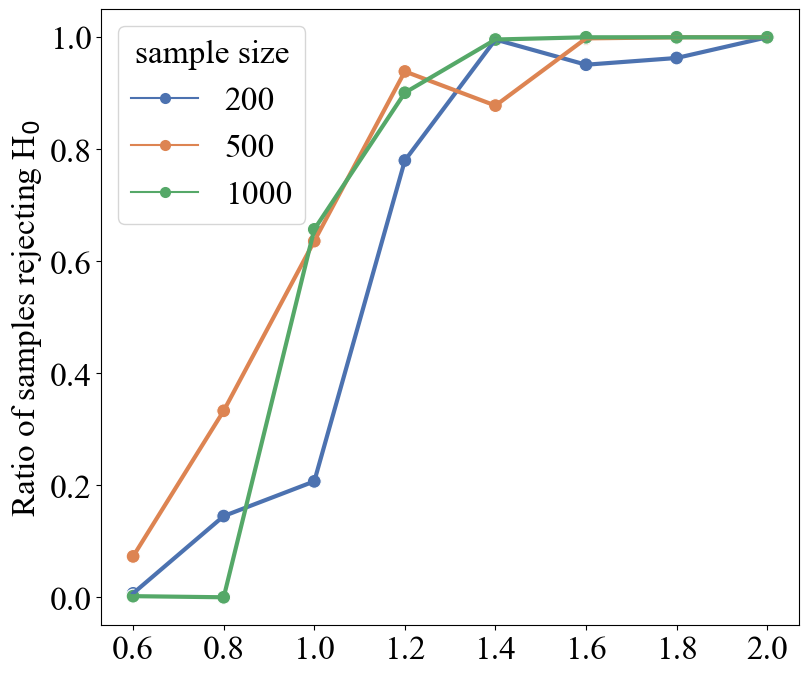

In [73]:
df_params = pd.read_csv('simulation_results_sd.csv')

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 24
plt.figure(figsize=(9, 8))


sns.scatterplot(data=df_params, x='sd_theta', y='prop', hue='n_subject', palette='deep',s=100,legend=False)
sns.lineplot(data=df_params, x='sd_theta', y='prop', hue='n_subject', palette='deep',linewidth=3,legend=False)

palette = sns.color_palette('deep', len(df_params['n_subject'].unique()))
handles = []
for i, hue_value in enumerate(df_params['n_subject'].unique()):
    line = mlines.Line2D([], [], color=palette[i], marker='o', markerfacecolor=palette[i], markeredgewidth=2, label=hue_value)
    handles.append(line)

plt.legend(handles=handles, title='sample size', loc='upper left')
plt.gca().set_xticks([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
plt.ylabel(r'Ratio of samples rejecting H$_0$')
plt.xlabel("")


In [16]:
# parameters
sd_theta_list = [1.0]
temp_list = [0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6]
x_init_list = [100]
x_step_list = [25]
n_subject_list = [200,500,1000]


df_params = pd.DataFrame(list(itertools.product(sd_theta_list, temp_list, x_init_list, x_step_list, n_subject_list)),
             columns = ['sd_theta','temp','x_init','x_step_up','n_subject'])

df_params['x_step_down'] = df_params['x_step_up']
df_params['mean_theta'] = 0.5


prop_reject_list = list()

with mp.Pool(processes=4) as pool:

    simu_func = partial(runSimu, df_params = df_params)
    
    for prop in tqdm(pool.imap_unordered(simu_func, range(len(df_params))),
                                total=len(df_params)):
        
        prop_reject_list.append(prop)

df_params['prop'] = [prop[1] for prop in prop_reject_list]
df_params.to_csv('simulation_results_temp.csv')

100%|██████████| 27/27 [06:30<00:00, 14.46s/it]


Text(0, 0.5, '')

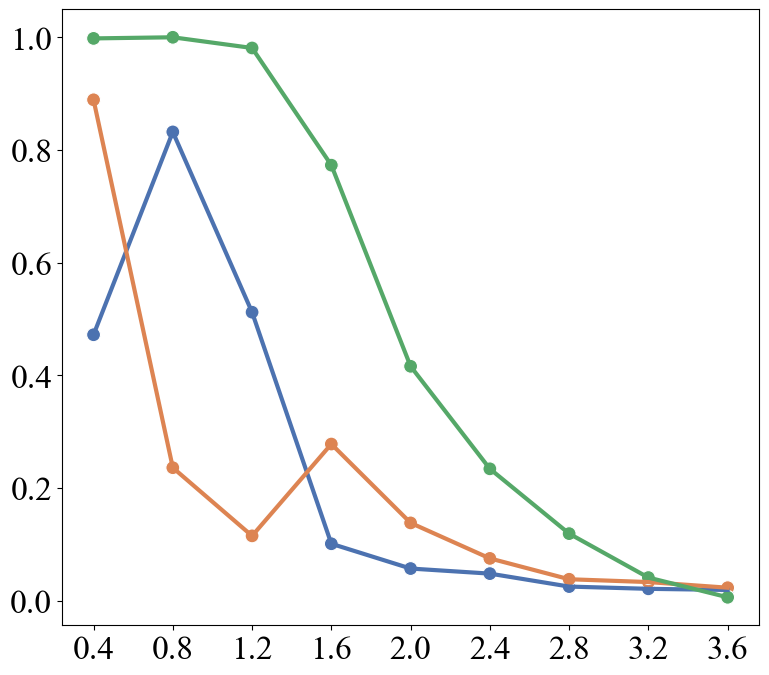

In [76]:
df_params = pd.read_csv('simulation_results_temp.csv')
df_params = df_params[df_params['n_subject'] > 100]

plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_params, x='temp', y='prop', hue='n_subject', palette='deep',s=100,legend=False)
sns.lineplot(data=df_params, x='temp', y='prop', hue='n_subject', palette='deep',linewidth=3, legend=False)
plt.gca().set_xticks([0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2,3.6])
plt.xlabel('')
plt.ylabel('')

In [11]:
# parameters
sd_theta_list = [1.0]
temp_list = [1.0]
x_init_list = [50,75,100,125,150,175,200,225,250]
x_step_list = [25]
n_subject_list = [200,500,1000]


df_params = pd.DataFrame(list(itertools.product(sd_theta_list, temp_list, x_init_list, x_step_list, n_subject_list)),
             columns = ['sd_theta','temp','x_init','x_step_up','n_subject'])

df_params['x_step_down'] = df_params['x_step_up']
df_params['mean_theta'] = 0.5


prop_reject_list = list()

with mp.Pool(processes=4) as pool:

    simu_func = partial(runSimu, df_params = df_params)
    
    for prop in tqdm(pool.imap_unordered(simu_func, range(len(df_params))),
                                total=len(df_params)):
        
        prop_reject_list.append(prop)

df_params['prop'] = [prop[1] for prop in prop_reject_list]
df_params.to_csv('simulation_results_initB.csv')

100%|██████████| 27/27 [07:28<00:00, 16.63s/it]


Text(0.5, 0, '')

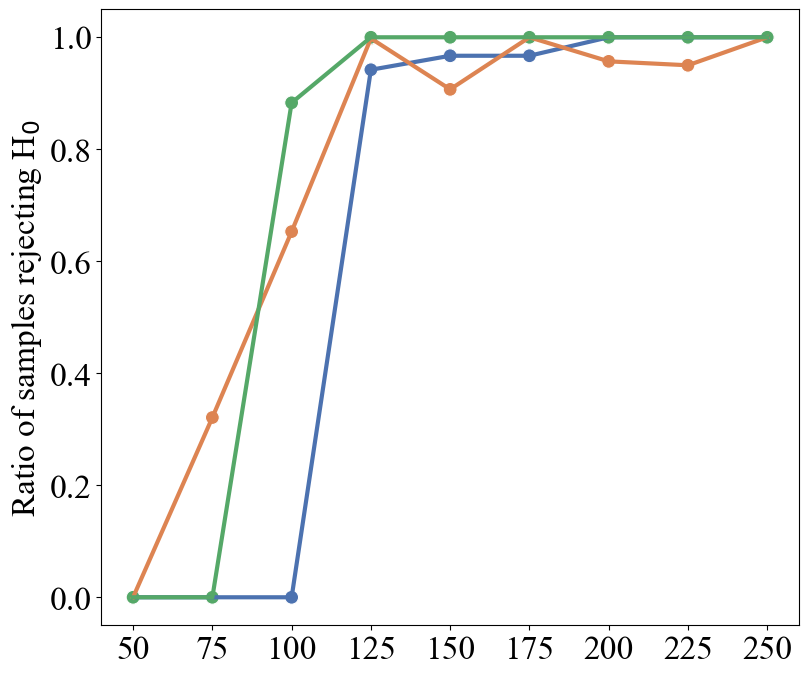

In [80]:
df_params = pd.read_csv('simulation_results_initB.csv')
df_params = df_params[df_params['n_subject'] > 100]

plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_params, x='x_init', y='prop', hue='n_subject', palette='deep',s=100,legend=False)
sns.lineplot(data=df_params, x='x_init', y='prop', hue='n_subject', palette='deep', linewidth=3,legend=False)
plt.gca().set_xticks([50,75,100,125,150,175,200,225,250])
plt.ylabel(r'Ratio of samples rejecting H$_0$')
plt.xlabel("")

In [12]:
# parameters
sd_theta_list = [1.0]
temp_list = [1.0]
x_init_list = [100]
x_step_list = [5,10,15,20,25,30,35,40,45]
n_subject_list = [200,500,1000]


df_params = pd.DataFrame(list(itertools.product(sd_theta_list, temp_list, x_init_list, x_step_list, n_subject_list)),
             columns = ['sd_theta','temp','x_init','x_step_up','n_subject'])

df_params['x_step_down'] = df_params['x_step_up']
df_params['mean_theta'] = 0.5


prop_reject_list = list()

with mp.Pool(processes=4) as pool:

    simu_func = partial(runSimu, df_params = df_params)
    
    for prop in tqdm(pool.imap_unordered(simu_func, range(len(df_params))),
                                total=len(df_params)):
        
        prop_reject_list.append(prop)

df_params['prop'] = [prop[1] for prop in prop_reject_list]
df_params.to_csv('simulation_results_step.csv')

100%|██████████| 27/27 [06:21<00:00, 14.14s/it]


Text(0, 0.5, '')

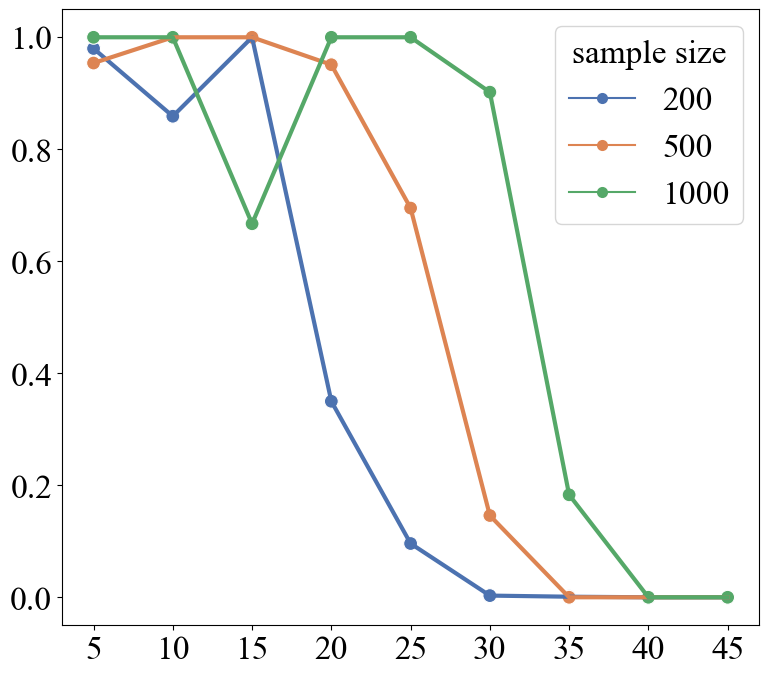

In [85]:
df_params = pd.read_csv('simulation_results_step.csv')
df_params = df_params[df_params['n_subject'] > 100]

plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_params, x='x_step_up', y='prop', hue='n_subject', palette='deep',s=100,legend=False)
sns.lineplot(data=df_params, x='x_step_up', y='prop', hue='n_subject', palette='deep', linewidth=3,legend=False)

palette = sns.color_palette('deep', len(df_params['n_subject'].unique()))
handles = []
for i, hue_value in enumerate(df_params['n_subject'].unique()):
    line = mlines.Line2D([], [], color=palette[i], marker='o', markerfacecolor=palette[i], markeredgewidth=2, label=hue_value)
    handles.append(line)

plt.legend(handles=handles, title='sample size', loc='upper right')

plt.gca().set_xticks([5,10,15,20,25,30,35,40,45])
plt.xlabel("")
plt.ylabel("")